In [1]:
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
get_ipython().ast_node_interactivity = 'all'
import torch

# Acknowledgement

[Supp code and exampels](https://github.com/joosthub/PyTorchNLPBookm) 
Perface > using code example: ""

> “ Natural Language Processing with PyTorch by Delip Rao and Brian McMahan (O’Reilly). Copyright 2019, Delip Rao and Brian McMahan, 978-1-491-97823-8.”

# One bot / Binary encoding

Example 1-1. Generating a “collapsed” one-hot or binary representation using scikit-learn

array([[1, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 0]], dtype=int64)

<AxesSubplot:>

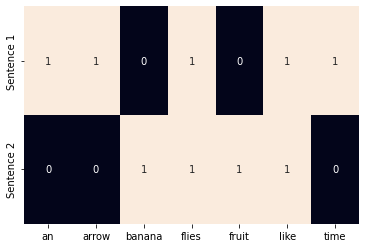

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
 
sentence1 = 'Time flies flies like an arrow.'
sentence2 = 'Fruit flies like a banana.'
corpus = [sentence1, sentence2]
vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']
#note here a, an are treated as one word, so only an is shwon
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
one_hot
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=vocab, # cbar is for the heat value illustartion
            yticklabels=['Sentence 1', 'Sentence 2'])


# TF-IDF representation
Example 1-2. Generating a TF-IDF representation using scikit-learn

<AxesSubplot:>

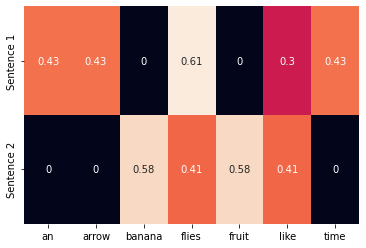

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
 
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= ['Sentence 1', 'Sentence 2'])

# Pytorch Basic

In [ ]:
#!conda install pytorch torchvision -c pytorch

In [49]:
import torch

def p(t=''):
    print('-------'+t+'-------')
    print()

## Describe()

In [13]:
def describe(x):
    """summarise properties of a tensor x

    Args:
        x (tensor): 
    """
    print("Type: {}".format(x.type()))
    print("Shape/size: {}".format(x.shape))
    print("Values: \n{}".format(x))
    print()

In [3]:
describe(torch.Tensor(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Random normal dist

In [4]:
describe(torch.rand(2, 3))   # uniform random
describe(torch.randn(2, 3))  # random normal

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.5866, 0.0962, 0.1946],
        [0.3136, 0.0838, 0.3909]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[ 0.2589,  0.4765, -0.0993],
        [-0.8002, -0.0610, -0.3848]])


## Tensor from list

In [5]:
x = torch.Tensor([[1, 2, 3],  
                 [4, 5, 6]])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## Tensfor from numpy

In [15]:
import torch
import numpy as np
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.9093, 0.7515, 0.5657],
        [0.5321, 0.7644, 0.4786]], dtype=torch.float64)



## Tensor properties

In [18]:
x = torch.FloatTensor([[1, 2, 3],  
                    [4, 5, 6]])
describe(x)

x = x.long()
describe(x)

x = torch.tensor([[1, 2, 3], 
                 [4, 5, 6]], dtype=torch.int64)
describe(x)

x = x.float() 
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])



## Tensor Operations

randn, add, arange, view/reshape

In [36]:
p('randn')
x = torch.randn(2, 3)
x

p('add')
describe(torch.add(x, x))
describe(x + x)

p('arange')
x = torch.arange(6)
x

p('view/reshape')

x = x.view(2, 3)
describe(x)

p('sum')
describe(torch.sum(x, dim=0))

p('transpose')

describe(torch.transpose(x, 0, 1))





-------randn-------



tensor([[-0.5208, -0.1943,  0.2444],
        [-0.1555, -0.2432, -0.8521]])

-------add-------

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.0416, -0.3887,  0.4888],
        [-0.3111, -0.4865, -1.7041]])

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[-1.0416, -0.3887,  0.4888],
        [-0.3111, -0.4865, -1.7041]])

-------arange-------



tensor([0, 1, 2, 3, 4, 5])

-------view/reshape-------

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])

-------sum-------

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])

-------transpose-------

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])



## Slicing and indexing a tensor

In [39]:
x = torch.arange(6).view(2, 3)
describe(x)

describe(x[:1, :2]) # row 0, first two cols

describe(x[0, 1])


Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])

Type: torch.LongTensor
Shape/size: torch.Size([1, 2])
Values: 
tensor([[0, 1]])

Type: torch.LongTensor
Shape/size: torch.Size([])
Values: 
1



## Complex indexing: noncontiguous indexing of a tensor

### index_select

In [43]:
# indices = torch.LongTensor([0, 2]) 
indices = torch.tensor([0,2])
describe(torch.index_select(x, dim=1, index=indices)) # 0, 2th col only

Type: torch.LongTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[0, 2],
        [3, 5]])



### particular row + col

In [60]:
x
p()
row_indices = torch.arange(2).long()
row_indices
p()
col_indices = torch.LongTensor([0, 1])
col_indices
p('particular row col elements')
describe(x[row_indices, col_indices]) # row0,col0 +  row1,col1
p('cat based rows')
describe(torch.cat([x, x], dim=0))
p('stack') # stack another depth, depth: 2, row: 2, col: 2
describe(torch.stack([x, x]))




tensor([[0, 1, 2],
        [3, 4, 5]])

--------------



tensor([0, 1])

--------------



tensor([0, 1])

-------particular row col elements-------

Type: torch.LongTensor
Shape/size: torch.Size([2])
Values: 
tensor([0, 4])

-------cat based rows-------

Type: torch.LongTensor
Shape/size: torch.Size([4, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])

-------stack-------

Type: torch.LongTensor
Shape/size: torch.Size([2, 2, 3])
Values: 
tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])



### Linear algebra: add, multiplication

In [68]:
x2 = torch.ones(3, 2)
x2
x2[:, 1] += 1 # all row, col 1
describe(x2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])



### mm, type must be the same

In [76]:
x1 = torch.arange(6).view(2, 3).float()
describe(x1)
describe(x2)

describe(torch.mm(x1, x2))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 1., 2.],
        [3., 4., 5.]])

Type: torch.FloatTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[ 3.,  6.],
        [12., 24.]])



## Tensors and Computational Graphs


### Creating tensors for gradient bookkeeping

In [77]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

True


### requires_grad   

"When you create a tensor with requires_grad=True, you are requiring PyTorch to manage **bookkeeping** information that computes gradients. 
First, PyTorch will keep track of the values of the **forward pass**. Then, at the end of the computations, a single **scalar** is used to compute a backward pass. The **backward pass** is initiated by using the backward() method on a tensor resulting from the evaluation of a loss function. The backward pass computes a gradient value for a tensor object that participated in the forward pass."


In [80]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

p()

z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)

False
--------------

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0

False


### .grad

the gradient is a value that represents the **slope** of a function output with respect to the **function input**
**Optimizers** use the .grad variable to **update** the values of the **parameters**.

## CUDA Tensors
- To use a GPU, you need to first allocate the tensor on the GPU’s memory
- Before it is run on CPU.
- The CUDA API was created by **NVIDIA** and is limited to use on only **NVIDIA GPUs**

Transfering the tensor from the CPU to the GPU while maintaining its underlying type. The preferred method in PyTorch is to be device agnostic and write code that works whether it’s on the GPU or the CPU.

In [6]:
print (torch.cuda.is_available())

# preferred method: device agnostic tensor instantiation
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

torch.zeros(1).cuda()

True
cuda


tensor([0.], device='cuda:0')